### Multi Classs Classification of Classes,Computer Science,Physics,Mathematics,Statistics,Quantitative, Biology,Quantitative Finance

#### Importing dataset of training and testing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_sm') #Loading spacy english

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
test.sample(5)

,ID,TITLE,ABSTRACT
6880,27853,An Approach for Spatial-temporal Traffic Model...,The volume and types of traffic data in mobi...
7384,28357,CVXR: An R Package for Disciplined Convex Opti...,CVXR is an R package that provides an object...
3640,24613,Ferromagnetism in chiral multilayer 2D semimetals,We calculate the temperature dependent long-...
6600,27573,A probabilistic gridded product for daily prec...,"Gridded data products, for example interpola..."
4297,25270,Standard Model - Axion - Seesaw - H portal inf...,Extending the Standard Model with a new comp...


In [4]:
train.sample(10)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
16306,16307,A simple efficient density estimator that enab...,This paper introduces a simple and efficient...,1,0,0,1,0,0
704,705,Common change point estimation in panel data f...,We establish the convergence rates and asymp...,0,0,1,1,0,0
17374,17375,A similarity criterion for sequential programs...,The execution of sequential programs allows ...,1,0,0,0,0,0
4597,4598,On central leaves of Hodge-type Shimura variet...,Kisin and Pappas constructed integral models...,0,0,1,0,0,0
13072,13073,Learning Structural Node Embeddings Via Diffus...,Nodes residing in different parts of a graph...,1,0,0,1,0,0
5287,5288,An Orchestrated Empirical Study on Deep Learni...,Deep learning (DL) has recently achieved tre...,1,0,0,0,0,0
10945,10946,Temperature induced transition from p-n to n-n...,The transport characteristics across the pul...,0,1,0,0,0,0
17357,17358,Correlations and enlarged superconducting phas...,We compute physical properties across the ph...,0,1,0,0,0,0
16117,16118,Absolute spectroscopy near 7.8 μm with a comb-...,We report the first experimental demonstrati...,0,1,0,0,0,0
10470,10471,Designing Deterministic Polynomial-Space Algor...,"In recent years, several powerful techniques...",1,0,0,0,0,0


In [5]:
print(len(train))
print(len(test))

20972
8989


In [6]:
train.describe()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
count,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000
mean,10486.500000,0.409784,0.286716,0.267881,0.248236,0.027990,0.011873
std,6054.239259,0.491806,0.452238,0.442866,0.432000,0.164947,0.108317
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5243.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10486.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15729.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,20972.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Preprocessing data

In [7]:
train['text'] = train['TITLE'] + train['ABSTRACT']
test['text'] = test['TITLE'] + test['ABSTRACT']

In [8]:
train_df = train.drop(['TITLE', 'ABSTRACT'],axis = 1)
test_df = test.drop(['TITLE', 'ABSTRACT'],axis = 1)

In [9]:
train_df.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,text
0,1,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps P...
1,2,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation i...
2,3,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...
3,4,0,0,1,0,0,0,A finite element approximation for the stochas...
4,5,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...


In [10]:
train_df.isnull().sum()

ID                      0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
text                    0
dtype: int64

## Text Cleaning

In [11]:
train_df['text'][0]

"Reconstructing Subject-Specific Effect Maps  Predictive models allow subject-specific inference when analyzing disease\nrelated alterations in neuroimaging data. Given a subject's data, inference can\nbe made at two levels: global, i.e. identifiying condition presence for the\nsubject, and local, i.e. detecting condition effect on each individual\nmeasurement extracted from the subject's data. While global inference is widely\nused, local inference, which can be used to form subject-specific effect maps,\nis rarely used because existing models often yield noisy detections composed of\ndispersed isolated islands. In this article, we propose a reconstruction\nmethod, named RSM, to improve subject-specific detections of predictive\nmodeling approaches and in particular, binary classifiers. RSM specifically\naims to reduce noise due to sampling error associated with using a finite\nsample of examples to train classifiers. The proposed method is a wrapper-type\nalgorithm that can be used w

In [15]:
# cleaning text function
import string
punct = string.punctuation

def text_clean(text):
    text = text.lower()  #Convert text in lower case
    text = text.replace("[^a-zA-Z#]", " ")
    punc_removed = [char for char in text if char not in punct]  #Removing Punctuations
    punc_removed_join = ''.join(punc_removed) 
    
    doc= nlp(punc_removed_join)
    text_out = [token.lemma_ for token in doc if token.is_stop == False and token.is_alpha and len(token)>2]
    txt = ' '.join(text_out)
    return txt

In [16]:
train_df['text'] = train_df['text'].apply(text_clean)

In [17]:
train_df

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,text
0,1,1,0,0,0,0,0,reconstruct subjectspecific effect map predict...
1,2,1,0,0,0,0,0,rotation invariance neural network rotation in...
2,3,0,0,1,0,0,0,spherical polyharmonics poisson kernel polyhar...
3,4,0,0,1,0,0,0,finite element approximation stochastic maxwel...
4,5,1,0,0,1,0,0,comparative study discrete wavelet transform w...
...,...,...,...,...,...,...,...,...
20967,20968,1,1,0,0,0,0,contemporary machine learn guide practitioner ...
20968,20969,0,1,0,0,0,0,uniform diamond coating wcco hard alloy cut in...
20969,20970,1,0,0,0,0,0,analyse soccer game clustering conceptor prese...
20970,20971,0,0,1,1,0,0,efficient simulation lefttail sum correlate lo...


In [82]:
test_df['text'] = test_df['text'].apply(text_clean)
test_df

,ID,text
0,20973,closedform marginal likelihood gammapoisson ma...
1,20974,laboratory midir spectra equilibrate igneous m...
2,20975,case static amsdu aggregation wlans frame aggr...
3,20976,gaiaeso survey inner disk intermediateage open...
4,20977,witnessfunction versus interpretationfunction ...
...,...,...
8984,29957,support mixeddatatype matrix multiplication bl...
8985,29958,axiomatic basis blackwell optimality theory ma...
8986,29959,genevis interactive visualization tool combine...
8987,29960,quantify causal effect speed camera road traff...


In [83]:
col = list(train_df.columns)
target = col[1:7]
print(target)

['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']


In [84]:
y = train_df[target]
y.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,0,0,1,0,0


<AxesSubplot:>

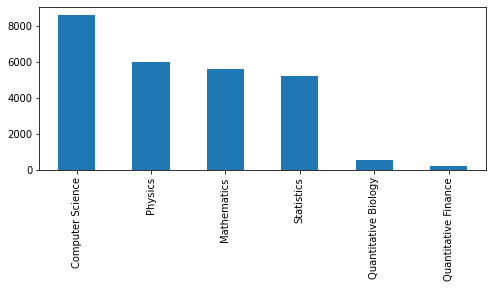

In [85]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

y.sum(axis=0).plot.bar()

### Train Test Split

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], y, test_size=0.25,random_state=42)

### TFIDF

In [91]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer=TfidfVectorizer(min_df=1, smooth_idf=True, norm="l2",tokenizer=lambda x: x.split(),sublinear_tf=True, ngram_range=(1,3))

# X_train_multilabel=vectorizer.fit_transform(X_train)
# X_test_multilabel=vectorizer.transform(X_test)


from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 2000,ngram_range=(1,3) )
v_train = vectorizer.fit_transform(X_train)
v_test = vectorizer.transform(X_test)
print(vectorizer.get_feature_names())

print(v_train.shape)
print(v_test.shape)


['abelian', 'ability', 'able', 'absence', 'absolute', 'absorption', 'abstract', 'abundance', 'accelerate', 'acceleration', 'access', 'accord', 'account', 'accretion', 'accuracy', 'accurate', 'accurately', 'achieve', 'acoustic', 'acquire', 'acquisition', 'act', 'action', 'activation', 'active', 'activity', 'actual', 'adapt', 'adaptation', 'adaptive', 'add', 'addition', 'additional', 'additionally', 'additive', 'address', 'address problem', 'admit', 'adopt', 'advance', 'advanced', 'advantage', 'adversarial', 'adversarial example', 'adversarial network', 'affect', 'affine', 'age', 'agent', 'aggregate', 'agn', 'agree', 'agreement', 'aim', 'algebra', 'algebraic', 'algebras', 'algorithm', 'algorithm base', 'algorithmic', 'algorithms', 'alignment', 'allocation', 'allow', 'alpha', 'alternate', 'alternative', 'amplitude', 'analogous', 'analogue', 'analyse', 'analysis', 'analytic', 'analytical', 'analytically', 'analyze', 'andor', 'angle', 'angular', 'anisotropic', 'anisotropy', 'annotation', 'a

In [92]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(SVC()).fit(v_train, y_train)
pred = clf.predict(v_test)

In [93]:
print("accuracy_score : -->",accuracy_score(y_test,pred))

accuracy_score : --> 0.6622162883845126


In [94]:
print("classification_report :")
print(classification_report(y_test,pred))

classification_report :
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      2116
           1       0.93      0.82      0.87      1527
           2       0.87      0.74      0.80      1428
           3       0.83      0.72      0.77      1306
           4       0.90      0.11      0.20       167
           5       0.89      0.27      0.42        59

   micro avg       0.86      0.77      0.81      6603
   macro avg       0.87      0.59      0.65      6603
weighted avg       0.86      0.77      0.80      6603
 samples avg       0.82      0.80      0.80      6603



C:\Users\satyam.singh\anaconda3\envs\keras\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
vt_test = vectorizer.transform(test_df['text'])

In [101]:
vt_test

<8989x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 427587 stored elements in Compressed Sparse Row format>

In [102]:
pred1 = clf.predict(vt_test)

In [103]:
pred1

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [105]:
data = pd.read_csv('sample_submission.csv')
submission=pd.DataFrame(pred1, columns=['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance'])
submission=pd.concat([data['ID'],submission],axis=1)
submission.to_csv("multi_label_topic.csv", index=False)
print(submission.shape)
submission.head()

(8989, 7)


,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0


## Countvectoriser

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

count_v = CountVectorizer(max_features=1000,ngram_range=(1,3))

Xtr = count_v.fit_transform(train_df['text']).toarray()
Xtes = count_v.transform(test_df['text']).toarray()

In [52]:
classifier=OneVsRestClassifier(LinearSVC(penalty="l2",loss='hinge'), n_jobs=-1)
classifier.fit(Xtr,y_train)
predictions=classifier.predict(Xtes)

ValueError: Found input variables with inconsistent numbers of samples: [20972, 15729]

#### Building Our Model, Estimator + Multilabel Estimator

In [92]:
import skmultilearn

In [93]:
dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

#### Convert Our Multi-Label Prob to Multi-Class # binary classficiation

In [94]:
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [95]:
binary_clf = BinaryRelevance(MultinomialNB())

In [96]:
binary_clf

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [97]:
binary_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [98]:
y_pred = binary_clf.predict(X_test)

In [99]:
y_pred = y_pred.toarray()

In [100]:
y_pred[:20]

array([[1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=int64)

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

0.5758105530832803


#### RandomForestClassifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [109]:
y_pred = classifier.predict(X_test)
y_pred[:10]

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0]], dtype=int64)

In [105]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="micro"))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2535
           1       0.93      0.73      0.82      1849
           2       0.84      0.69      0.76      1711
           3       0.76      0.57      0.65      1554
           4       0.00      0.00      0.00       194
           5       0.00      0.00      0.00        67

   micro avg       0.82      0.68      0.75      7910
   macro avg       0.55      0.46      0.50      7910
weighted avg       0.80      0.68      0.73      7910
 samples avg       0.73      0.72      0.71      7910

0.5758105530832803
0.7469796341042458


C:\Users\satyam.singh\anaconda3\envs\keras\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\satyam.singh\anaconda3\envs\keras\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import f1_score,accuracy_score

lp_classifier = LabelPowerset(LogisticRegression())
lp_classifier.fit(X_train, y_train)
lp_predictions = lp_classifier.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,lp_predictions))
print("F1 score = ",f1_score(y_test,lp_predictions, average="micro"))

C:\Users\satyam.singh\anaconda3\envs\keras\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy =  0.6489192625556262
F1 score =  0.7738752959747435
